In [92]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.decomposition import PCA
from skimage.restoration import inpaint_biharmonic
from skimage.color import rgb2gray
import cv2

# Task 1: Image Reconstruction

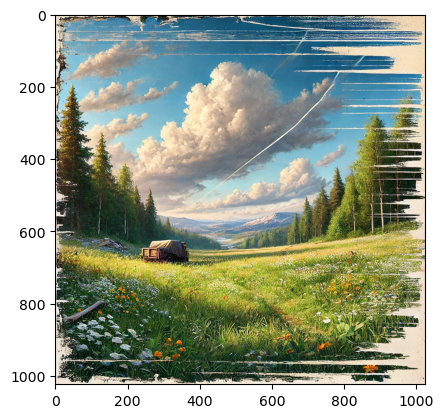

In [240]:
# Load the image
Precon_img = io.imread('Image_Reconstruction_Exercise.png')
plt.imshow(Precon_img)
plt.show()

In [241]:
# normalise the image
Precon_img = Precon_img / 255.0

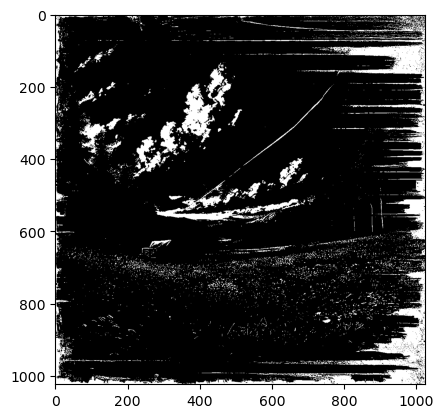

In [242]:
# Create a mask for inpainting by first getting the binary version of the image
thr=0.85
greyscale = rgb2gray(Precon_img)
mask=(greyscale > thr)
plt.imshow(mask, cmap='gray')

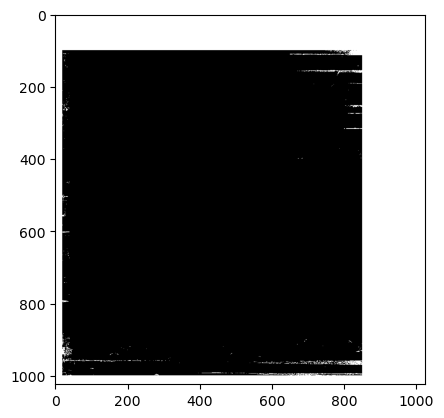

In [255]:
# Cleaning out the mask of the features that are actually present in the image
mask[100:920,40:650]=0
mask[400:900,600:920]=0
mask[200:350,600:800]=0
mask[1000:1024,0:1024]=1
mask[0:100,0:1024]=1
mask[0:1024,850:1024]=1
mask[0:1024,0:20]=1
plt.imshow(mask, cmap='gray')

In [256]:
print(Precon_img.shape)

(1024, 1024, 3)


In [257]:
print(mask.shape)

(1024, 1024)


In [261]:
# Seperate the image into RGB channels
R = Precon_img[:, :, 0]
G = Precon_img[:, :, 1]
B = Precon_img[:, :, 2]

# Apply Inpainting on each channel
R = inpaint_biharmonic(R, mask)
G = inpaint_biharmonic(G, mask)
B = inpaint_biharmonic(B, mask)

In [262]:
# Recombine the channels
Recon_img = np.zeros_like(Precon_img)
Recon_img[:, :, 0] = R
Recon_img[:, :, 1] = G
Recon_img[:, :, 2] = B

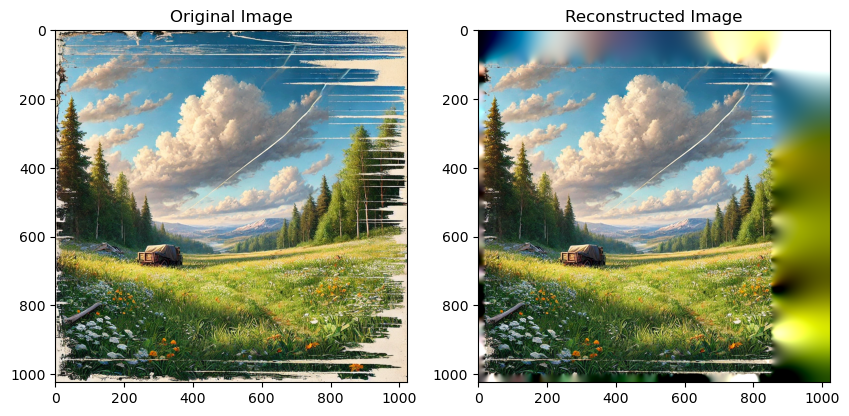

In [263]:
# Plot the original and reconstructed image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(Precon_img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(Recon_img)
plt.title('Reconstructed Image')
plt.show()

**Question 1:** What are the key challenges in image reconstruction, and how do interpolation and inpainting address these challenges?

**Answer:** The key challenges in image reconstruction are: finding the appropriate area of the tear/problem in the image, even with the correct mask you will struggle with the idea of fitting the correct mask to the original image to get genuinely good result. Both techniques help in reconstructing the image by filling in the missing parts with the help of the surrounding pixels, inpainting is a bit more advanced than interpolation as interpolation only uses the average of the surrounding pixels to fill in the missing parts of the image while inpainting uses more advanced techniques to fill in the missing parts of the image.

# Task 2: PCA for Image Compression

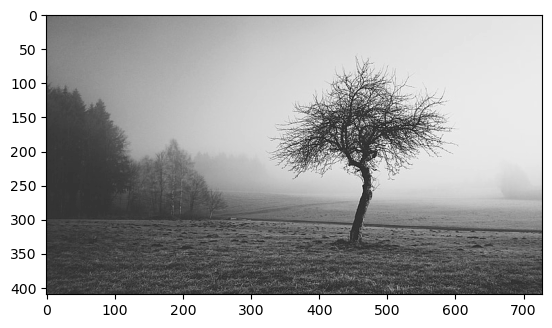

In [183]:
# Load the image
pca_img = io.imread('PCA-Exercise.jpg', as_gray=True)
plt.imshow(pca_img, cmap='gray')
plt.show()

In [184]:
# saving the original shape for later
og_shape = pca_img.shape
print(og_shape)

(410, 728)


In [185]:
# flatten the image to 1D array
Flattened_pca_img = pca_img.flatten().reshape(-1, 1)

In [186]:
print(Flattened_pca_img.shape)

(298480, 1)


In [187]:
# normalize the image
Flattened_pca_img = Flattened_pca_img / 255.0
print(Flattened_pca_img.shape)

(298480, 1)


In [206]:
# Applying PCA and fitting it to the image
pca = PCA(n_components=1)
pcaed_img = pca.fit_transform(Flattened_pca_img)

In [203]:
# Reconstruct the image
recon_pca_img = pca.inverse_transform(pcaed_img)

In [204]:
# Reshape the image to original shape
recon_pca_img = recon_pca_img.reshape(og_shape)
print(recon_pca_img.shape)

(410, 728)


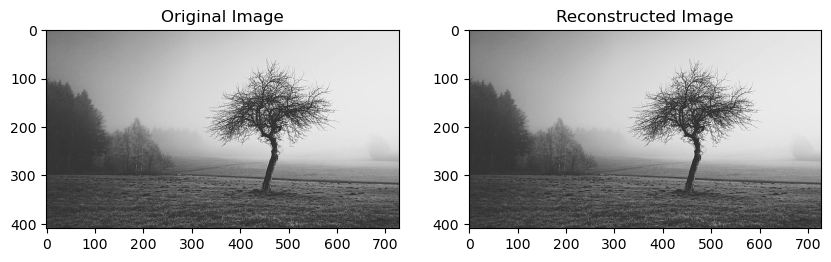

In [205]:
# Plot the original and reconstructed image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(pca_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(recon_pca_img, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

**Question 2:** How does reducing the number of principal components affect the quality of the reconstructed image? 

**Answer:** Reducing the number of principal components affects the quality of the reconstructed image by reducing the amount of information that is used to reconstruct the image. The more principal components you use the more information you have to reconstruct the image, the less principal components you use the less information you have to reconstruct the image. So you need to find a balance between the number of principal components you use and the quality of the reconstructed image.

# Task 3: Frequency Domain Filtering

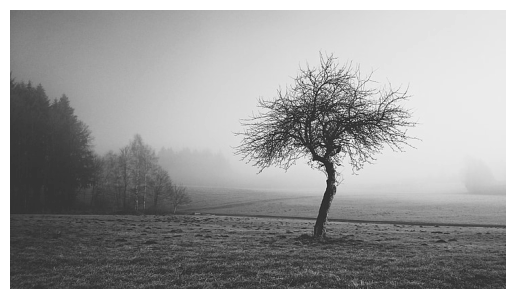

In [169]:
# Load the image
Tree = io.imread("PCA-Exercise.jpg", as_gray=True)
plt.axis('off')
plt.imshow(Tree, cmap='gray')
plt.show()

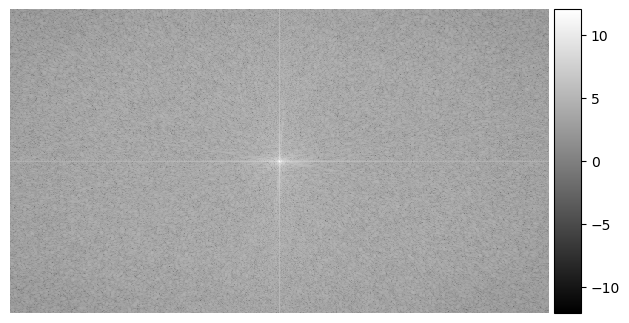

In [170]:
# Frequency Domain Filtering
freq_image = np.fft.fft2(Tree)
freq_image = np.fft.fftshift(freq_image)
plt.axis('off')
io.imshow(np.log(np.abs(freq_image)), cmap='gray')
io.show()

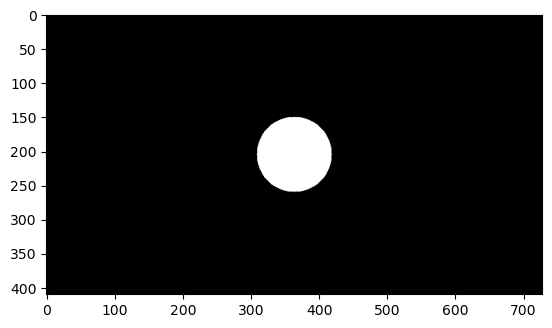

In [177]:
# Initialise a mask for low pass filter
rows, cols = Tree.shape
mask = np.zeros((rows, cols), dtype=np.uint8)

# Create a circle mask in the center to get the low frequency components
radius = 55
center = (cols // 2, rows // 2)
cv2.circle(mask, center, radius, 1, -1)

plt.imshow(mask, cmap='gray')

In [178]:
low_pass_image = freq_image * mask

In [179]:
inverse_low = np.fft.ifft2(low_pass_image)
LowPassed_Img = np.abs(inverse_low)

In [180]:
mask = 1 - mask
high_pass_image = freq_image * mask

In [181]:
inverse_high = np.fft.ifft2(high_pass_image)
HighPassed_Img = np.abs(inverse_high)

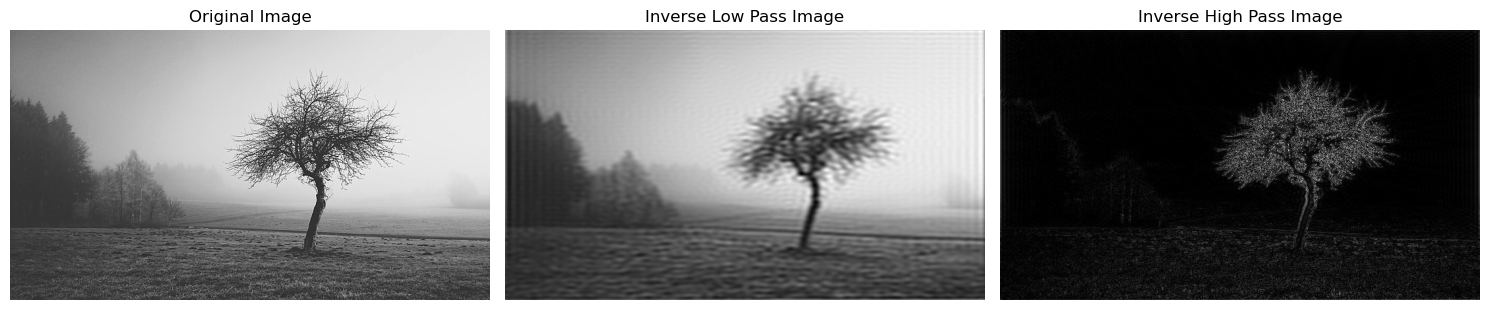

In [182]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(Tree, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(LowPassed_Img, cmap='gray')
plt.title('Inverse Low Pass Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(HighPassed_Img, cmap='gray')
plt.title('Inverse High Pass Image')
plt.axis('off')
plt.show()

**Question 3:** What is the significance of low-frequency and high-frequency components in an image, and how do these components impact the filtered results?

**Answer:** Low-frequency components in an image are the smooth areas of the image, while high-frequency components are the edges and fine details in the image. In the filtered results, the low-pass filter retains the smooth areas of the image while removing the fine details and edges, resulting in a blurred image. The high-pass filter retains the edges and fine details while removing the smooth areas, resulting in an image with enhanced edges and details.
